The plan of work:
______________________________________________________________________________________________________________________

Untuned solution:

1) Check the target - the number of classes - understand which type of task we have <br>
    a) if numeric - okay<br>
    b) if categorical - one hot encoding or dummy function<br>
2) The target - check balanced / imbalanced situation + visualisstion<br>
3) Check the types of features<br>
    a) if numeric - okay<br>
    b) if categorical - one hot encoding or dummy function<br>
4) Check the distribution of data<br>
    a) if distribution is hight - normalize / standartize<br>
    b) if distribution is NOT hight(all the random values is near with mean) - okay<br>
5) Split data (lots of ways(Validation, CrossValidation))<br>
6) Staright solution with few models, define benchmark<br>

______________________________________________________________________________________________________________________

Tuned solution: 

<s>1) Try approach for target value (to make just 2 classes, because classes are unbalanced)<br></s>
1) Implement Feature Selection and define features with the most Information Gain (reduce the number of features)<br>
2) Split data (lots of ways(Validation, CrossValidation))<br>
3) Staright solution with few models, define benchmark for 2 classes<br>
4) Comapare results




In [1]:
#Import libraries

In [3]:
#EDA
from __future__ import print_function
import pandas as pd
import numpy as np
import sklearn 
import scipy

#Plotting
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

#Ignore warnings
import warnings
warnings.simplefilter('ignore')

#Preproccesing 
from sklearn import preprocessing
from sklearn.model_selection import KFold, cross_val_score

#Metrics
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split

#Models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier, LogisticRegression 
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import Perceptron
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
from sklearn.multiclass import OneVsRestClassifier

#Feature selecting 
#from boruta import BorutaPy

<h2>Part 1</h2>

In [4]:
#Read the data

In [8]:
data = pd.read_csv('sample.csv', header = None)

**1) Check the target - the number of classes - understand which type of task we have**<br>
a) if numeric - okay<br>
b) if categorical - one hot encoding or dummy function<br>

In [9]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,286,287,288,289,290,291,292,293,294,295
0,0,0,0,20000.0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,259.227165,B
1,0,0,0,7059.0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,271.983584,E
2,0,0,0,3150.0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,235.233437,D
3,0,0,0,24000.0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,415.104389,C
4,0,0,0,5600.0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,462.230610,D


Now, we can assume, that our task is MultiClassification task

In [10]:
#Rename target and encode it 

In [11]:
data = data.rename(columns=({295: 'y'}))

dic = {'A' : 0, 'B' : 1, 'C' : 2, 'D' : 3, 'E' : 4}
data['y'] = data['y'].map(dic)

In [12]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,286,287,288,289,290,291,292,293,294,y
0,0,0,0,20000.0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,259.227165,1
1,0,0,0,7059.0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,271.983584,4
2,0,0,0,3150.0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,235.233437,3
3,0,0,0,24000.0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,415.104389,2
4,0,0,0,5600.0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,462.230610,3


**2) The target - check balanced / imbalanced situation + visualisstion**

In [13]:
data['y'].value_counts(normalize = True)

2    0.708862
3    0.140300
1    0.099823
4    0.037906
0    0.013109
Name: y, dtype: float64

We can assume, that we have imbalanced classes

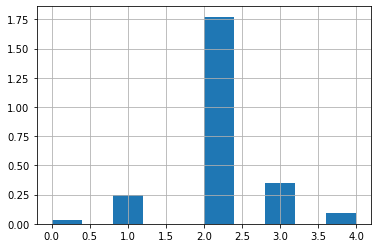

In [14]:
#Distribution of target value
#On the histogramm we see problem with imbalanced classes better
##Normed - applies when multiple classes are plotted
data['y'].hist(normed = True);

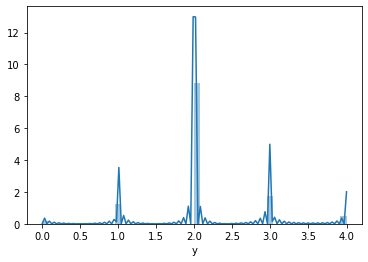

In [15]:
#Distribution of target value
sns.distplot(data['y']);

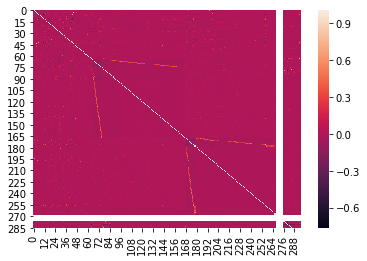

In [16]:
corr_matrix = data.corr()
sns.heatmap(corr_matrix);

It looks a little bit messy, but also can tell that lots of values are hight correlated(near with + 1.0). It means that we can remove one from the boundary of them. But for now we will continue with situation in order to make a benchmark.

**3) Check the types of features**

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66137 entries, 0 to 66136
Columns: 296 entries, 0 to y
dtypes: float64(4), int64(292)
memory usage: 149.4 MB


We can assume that we have all the numerical values (int64 and float64).<br>

**4) Check the distribution of data**<br>
a) if distribution is hight - normalize / standartize <br>
b) if distribution is NOT hight(all the random values is near with mean) - okay<br>

In [13]:
data.describe(include='all').T.head()

,count,mean,std,min,25%,50%,75%,max
0,66137.0,0.004249,0.065044,0.0,0.0,0.0,0.0,1.0
1,66137.0,0.014757,0.120581,0.0,0.0,0.0,0.0,1.0
2,66137.0,0.003765,0.061244,0.0,0.0,0.0,0.0,1.0
3,66137.0,11226.207294,8153.148240,13.0,4000.0,9614.8,18984.0,72360.0
4,66137.0,0.213511,0.609365,0.0,0.0,0.0,0.0,10.0


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66137 entries, 0 to 66136
Columns: 296 entries, 0 to y
dtypes: float64(4), int64(292)
memory usage: 149.4 MB


In [15]:
data.dtypes.value_counts()

int64      292
float64      4
dtype: int64

We can see, that data has high values range (check the mean of features or min and max etc)

In [16]:
#Normalisation 

In [17]:
#Split on X and y
y = data['y'].values
X_normalized = data.drop('y', axis = 1)
X_normalized = pd.DataFrame(data = preprocessing.normalize(data))

In [18]:
X_normalized.describe(include='all').T.head()

,count,mean,std,min,25%,50%,75%,max
0,66137.0,1.017012e-06,0.000019,0.000000,0.000000,0.000000,0.000000,0.001328
1,66137.0,9.612959e-07,0.000016,0.000000,0.000000,0.000000,0.000000,0.002043
2,66137.0,7.424966e-07,0.000023,0.000000,0.000000,0.000000,0.000000,0.002502
3,66137.0,9.742737e-01,0.080226,0.002738,0.988526,0.997673,0.999321,0.999991
4,66137.0,2.578886e-05,0.000096,0.000000,0.000000,0.000000,0.000000,0.002710


**5) Split data (lots of ways(Validation, CrossValidation))<br>
  6) Staright solution with few models, define benchmark**

In [19]:
#Define the Kfold CrossValidation
kf = KFold(n_splits=5, random_state=42, shuffle=True)

#kf.get_n_splits(X)
print(kf) 

KFold(n_splits=5, random_state=42, shuffle=True)


***KNN***

In [20]:
def get_auc_knn_valid(X, y, neighbours_number, seed):
    %time
    res = []
    for num_neighb in range(1,neighbours_number):
        knn = KNeighborsClassifier(n_neighbors=num_neighb, n_jobs = -1)
        estimator = knn
        prediction = cross_val_score(estimator, X, y, scoring='accuracy', cv = kf)
        res.append([prediction.mean(), num_neighb])
        #print(f'num_k %d'%num_neighb, prediction.mean())
        return(max(res))


get_auc_knn_valid(X_normalized, y, neighbours_number = 51, seed = 42)

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 5.01 µs


[0.6298289830555011, 1]

**Perceptron**

In [22]:
# model = Perceptron(random_state = 241)
# model.fit(X_normalized, y)
# predict = model.predict(X_test)
# print(metrics.classification_report(predict, y_test))

**Logistic Regression**

In [23]:
C = 1.0
# C = 1e4
#C = 1e-2
def get_auc_lr_valid(X, y, C = C, seed = 42):
    %time
    logit = LogisticRegression(n_jobs = -1, random_state = seed, C = C, multi_class='multinomial', solver='lbfgs')
    #logit = LogisticRegression(n_jobs = -1, random_state = seed, C = C, multi_class='ovr', solver='lbfgs')
    estimator = logit
    prediction = cross_val_score(estimator, X_normalized, y, scoring='accuracy', cv = kf)
    return (prediction.mean())


get_auc_lr_valid(X_normalized, y, C = 1.0, seed = 42)

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 4.05 µs


0.7085896831738709

**SGDClassifier**

In [24]:
def get_auc_sgd_valid(X, y, seed = 42):
    %time
    #sgd_logit = sklearn.linear_model.SGDClassifier(loss = 'log', random_state = seed, n_jobs = -1)
    sgd_logit = sklearn.linear_model.SGDClassifier(loss = 'log', learning_rate='adaptive', eta0 = 0.05,
                                              penalty = 'l2',  random_state = 17, n_jobs = -1)
    estimator = sgd_logit
    prediction = cross_val_score(estimator, X, y, scoring='accuracy', cv = kf)
    return prediction.mean()


get_auc_sgd_valid(X_normalized, y, seed=42)

CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 6.2 µs


0.7090281618983665

**RandomForestClassifier**

In [24]:
def get_auc_rnd_forest_valid(X, y, seed = 42):
    %time
    rand_forest = RandomForestClassifier(n_estimators = 100, max_depth=9, random_state = seed, class_weight='balanced')
    estimator = rand_forest
    prediction = cross_val_score(estimator, X, y, scoring='accuracy', cv = kf)
    return prediction.mean()


get_auc_rnd_forest_valid(X_normalized, y, seed = 42)

CPU times: user 2 µs, sys: 1 µs, total: 3 µs
Wall time: 4.29 µs


0.6225560460182504

**GradientBoostingClassifier**

In [26]:
def get_auc_gbm_valid(X, y):
    %time
    result = []
    for lr in np.linspace(0.05, 0.2, 20):
        for n_est in range(40, 70):
            GBM_model = GradientBoostingClassifier(learning_rate = lr, n_estimators = n_est,
                                                   min_samples_leaf = 50, min_samples_split = 500, max_depth = 8,
                                                   max_features = 'sqrt')
                                           
    estimator = GBM_model
    prediction = cross_val_score(estimator, X, y, scoring='accuracy', cv = kf)
    result.append(prediction.mean())
    return result


get_auc_gbm_valid(X_normalized, y)

CPU times: user 2 µs, sys: 1 µs, total: 3 µs
Wall time: 4.29 µs


[0.9229326066947255]

**For now, we can assume, that the best approach was with GradienBoostingMachine. Let's define the banchmark as 0.9253 (Solution without Feature Selection)** 

<h2>Part 2</h2>

In [27]:
#Boruta Selector

In [ ]:
rfc = RandomForestClassifier(n_estimators=200, n_jobs=-1, class_weight='balanced', max_depth=10)
boruta_selector = BorutaPy(rfc, n_estimators='auto', verbose=2, random_state=42)

%time
boruta_selector.fit(X_normalized.values, y)


CPU times: user 2 µs, sys: 1 µs, total: 3 µs
Wall time: 5.01 µs
Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	296
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	296
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	296
Rejected: 	0


In [30]:
feature_df = pd.DataFrame(X_normalized.columns.tolist(), columns=['features'])
feature_df['rank'] = boruta_selector.ranking_
feature_df = feature_df.sort_values('rank', ascending=True).reset_index(drop=True)

In [45]:
feature_df[:30]

,features,rank
0,295,1
1,294,1
2,3,1
3,64,1
4,271,1
5,6,1
6,281,1
7,43,1
8,39,1
9,36,1


In [32]:
#Check it up
# # number of selected features
print ('\n Number of selected features: %d' %boruta_selector.n_features_)

feature_df = pd.DataFrame(X_normalized.columns.tolist(), columns=['features'])
feature_df['rank'] = boruta_selector.ranking_
feature_df = feature_df.sort_values('rank', ascending=True).reset_index(drop=True)

print ('\n Top %d features:' % boruta_selector.n_features_)
print (feature_df.head(boruta_selector.n_features_))

feature_df.to_csv('boruta-feature-ranking.csv', index=False)

# check ranking of features
print ('\n Feature ranking:')
print (boruta_selector.ranking_)



 Number of selected features: 14

 Top 14 features:
    features  rank
0        295     1
1        294     1
2          3     1
3         64     1
4        271     1
5          6     1
6        281     1
7         43     1
8         39     1
9         36     1
10        33     1
11        29     1
12        25     1
13        23     1

 Feature ranking:
[262  87 250   1  14  65   1  59 245 138 238  30 253  38 210 225  84   4
  96 214  10 122  48   1 155   1 154 225 204   1 255 100 168   1  16 171
   1  74  26   1 258   8   6   1  13  15  43  97  16 147 252  22 258 204
  70 239  77 224 244 278 271  35 219 222   1  83   2   9  32  50  80  18
  25  36  41  66 272  52  68 145  51 111  55  78  28  66 141  63  58  63
  57  82 213 132 178 110  88 188 198 143 231 260  72 170 270 200 183 239
 134 264 193 212 241 206 120 258 172 268 230 157 250 231 216 215 146 196
 235   3 264 188 237 227 177 262 181 112 117 162 197 134   5 141 158  37
 123  98 256 210 150 202 144 191 190 208 174 115 254 187  8

In [33]:
#Defined DataFrame with selected features from Boruta Selector

X_filtered = pd.DataFrame(data = X_normalized, columns = X_normalized.columns[boruta_selector.support_])
X_filtered.head()

,3,6,23,25,29,33,36,39,43,64,271,281,294,295
0,0.999849,0.000050,-0.000050,0.00005,0.000000,0.000000,0.000050,0.000000,0.000680,0.011598,0.000050,0.000050,0.012959,0.000050
1,0.999073,0.000142,-0.000142,0.00000,0.000142,0.000000,0.000000,0.000000,0.000057,0.019248,0.000142,0.000142,0.038494,0.000566
2,0.991920,0.000315,-0.000315,0.00000,0.000000,0.000000,0.000315,0.000315,0.001386,0.102971,0.000315,0.000315,0.074074,0.000945
3,0.999740,0.000042,-0.000042,0.00000,0.000000,0.000042,0.000042,0.000042,0.000567,0.014829,0.000042,0.000042,0.017292,0.000083
4,0.920059,0.000164,-0.000164,0.00000,0.000000,0.000000,0.366217,0.000000,0.000920,0.116650,0.000164,0.000164,0.075943,0.000493


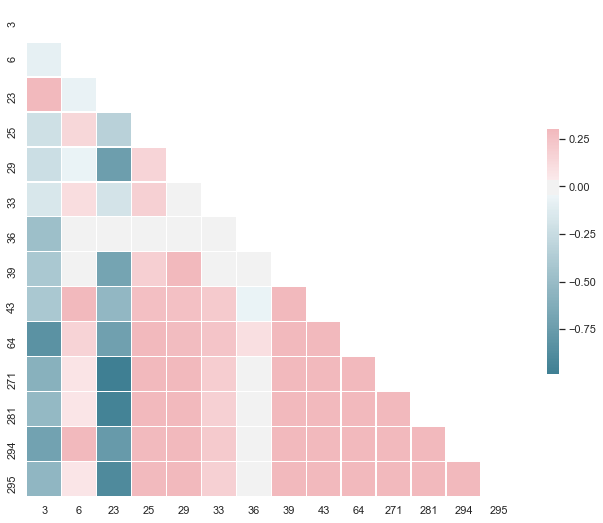

In [34]:
#Plot a correlation matrix for X

def corr_matrix(data):
    sns.set(style="white")


    # Compute the correlation matrix
    corr = data.corr()

    # Generate a mask for the upper triangle
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=(11, 9))

    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(220, 10, as_cmap=True)

    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
                square=True, linewidths=.5, cbar_kws={"shrink": .5})
    
corr_matrix(X_filtered)    

We can consider that almost all the values are not high correlated. At least few ones are, but we will try to fit models. <br>

In the case of two normal or almost normal values, the correlation coefficient between them can be used as a measure of interdependence, and this is confirmed by many practical results.
However, when interpreting “interdependence”, the following difficulties are often encountered: if one quantity is correlated with another, this can only be a reflection of the fact that both of them are correlated with some third quantity or with a set of quantities that, roughly speaking, remain behind the frame and not entered into the model.

**GradientBoostingClassifier**

In [35]:
get_auc_gbm_valid(X_filtered, y)

CPU times: user 2 µs, sys: 1 µs, total: 3 µs
Wall time: 4.77 µs


[0.9975202855106945]

**KNN**

In [36]:
get_auc_knn_valid(X_filtered, y, neighbours_number = 51, seed = 42)

CPU times: user 2 µs, sys: 1e+03 ns, total: 3 µs
Wall time: 4.77 µs


[0.6253533739860846, 1]

**Logistic Regression**

In [37]:
get_auc_lr_valid(X_filtered, y, C = 1.0, seed = 42)

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 4.05 µs


0.7085896831738709

**SGDClassifier**

In [38]:
get_auc_sgd_valid(X_filtered, y, seed=42)

CPU times: user 2 µs, sys: 1e+03 ns, total: 3 µs
Wall time: 6.2 µs


0.7090281618983665

**RandomForestClassifier**

In [25]:
get_auc_rnd_forest_valid(X_filtered, y, seed = 42)

NameError: name 'X_filtered' is not defined

After Feature Selection we found 14 features with high Information Gain(using Boruta approach). Now we can say, that we can remove almost more that half of features from data, because in our case they don't give us usefull information. 

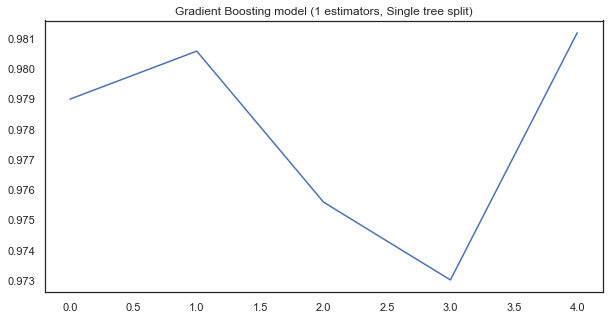

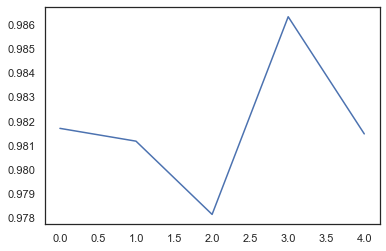

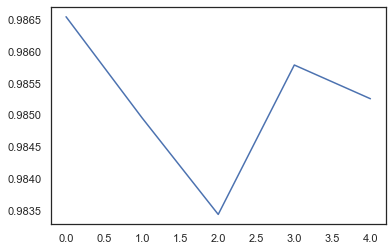

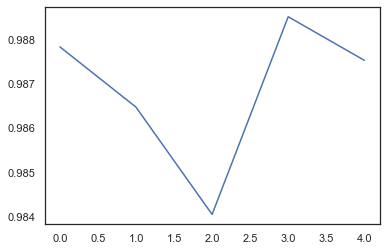

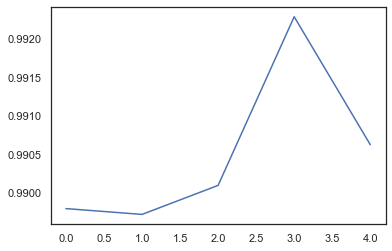

KeyboardInterrupt: 

In [48]:
plt.figure(figsize=(10, 5))
plt.title('Gradient Boosting model')
#plt.scatter(X_filtered, y)
#plt.plot(x, gradient_boosting_regressor.predict(x), color='r')
result = []
for lr in np.linspace(0.05, 0.2, 20):
    for n_est in range(40, 70):
        GBM_model = GradientBoostingClassifier(learning_rate = lr, n_estimators = n_est,
                                               min_samples_leaf = 50, min_samples_split = 500, max_depth = 8,
                                               max_features = 'sqrt')
    estimator = GBM_model
    #prediction = 
    plt.plot(cross_val_score(estimator, X_filtered, y, scoring='accuracy', cv = kf))
    #result.append(prediction.mean())
    #print(result)
    plt.show()


In [47]:
X_filtered.shape, y.shape

((66137, 14), (66137,))